# Basic analysis with a single audio file

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import IPython.display as ipd
import numpy as np
import librosa
import librosa.display

np.random.seed(37)

# Let's just load a file

In [2]:
fname = './mp3/100032.mp3'
y, sr = librosa.load(fname)

In [3]:
ipd.Audio(y, rate=sr)

In [4]:
duration = librosa.core.get_duration(y=y, sr=sr)
print('duration is {:.2f} seconds'.format(duration))

duration is 10.27 seconds


# Time domain plot of file

Text(0.5,1,'Raw plot of file ./mp3/100032.mp3')

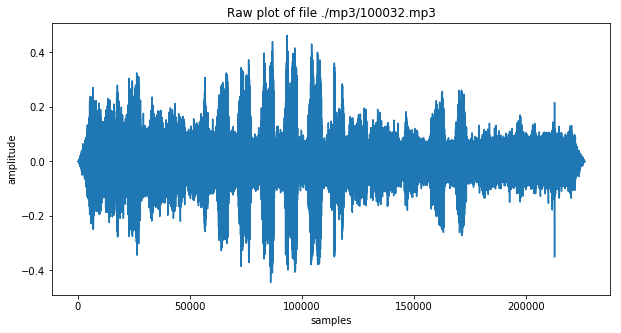

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y)
ax.set_ylabel('amplitude')
ax.set_xlabel('samples')
ax.set_title('Raw plot of file {}'.format(fname))

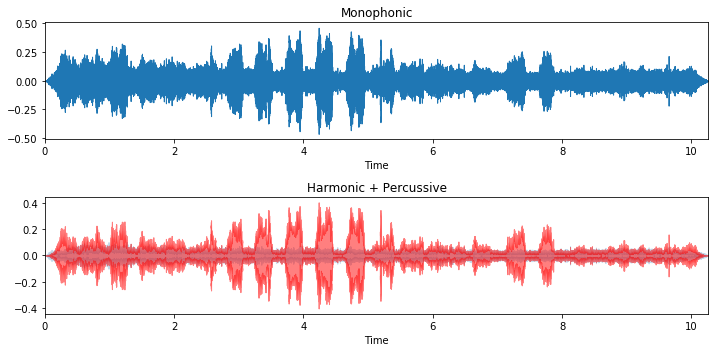

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(2, 1, 2)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

plt.tight_layout()

# Frequency domain plot of file

In [7]:
def get_fft(y, sr):
    Fs = float(sr)
    n = len(y)
    k = np.arange(n)
    T = n / Fs
    
    freq = k / T
    freq = freq[range(n / 2)]
    
    amp = np.fft.fft(y) / n
    amp = amp[range(n / 2)]
    
    return freq, amp

In [8]:
freq, amp = get_fft(y, sr)

Text(0.5,1,'Frequency domain plot of ./mp3/100032.mp3')

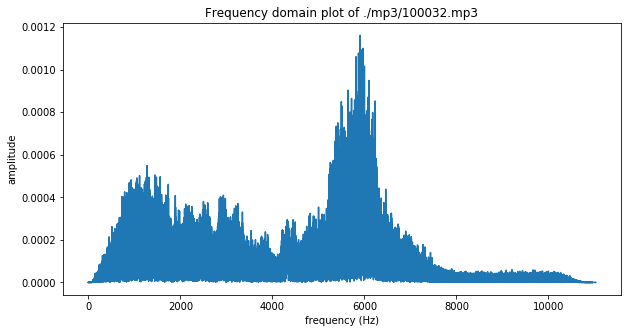

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(freq, abs(amp))
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')
ax.set_title('Frequency domain plot of {}'.format(fname))

# Spectrograms

[Spectrograms](https://en.wikipedia.org/wiki/Spectrogram) show the intensity of frequencies over time. 

* Short-time Fourier Transform
* Mel-spectrogram
* Constant-Q spectrogram

<Figure size 720x360 with 0 Axes>

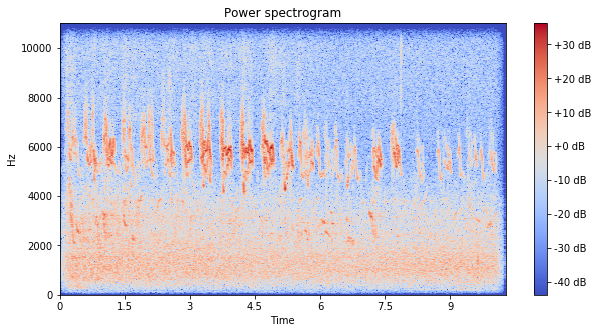

In [10]:
hop_length = 512
n_fft = 2048
X = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
S = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')

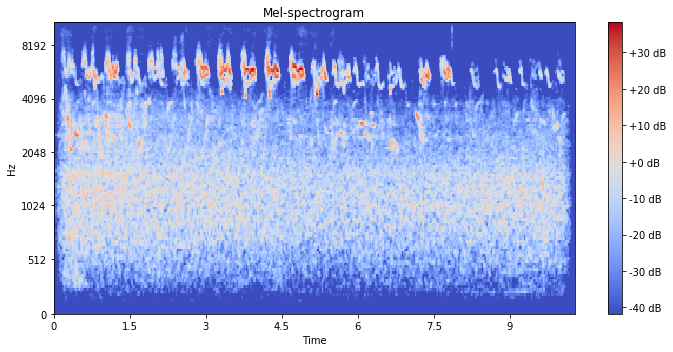

In [11]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512)
logS = librosa.amplitude_to_db(S)
plt.figure(figsize=(10, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')
plt.tight_layout()

<Figure size 1080x360 with 0 Axes>

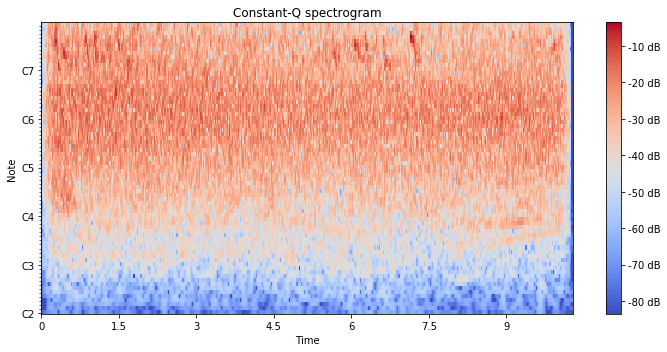

In [12]:
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(y, sr=sr, fmin=fmin, n_bins=72)
logC = librosa.amplitude_to_db(abs(C))
plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q spectrogram')
plt.tight_layout()

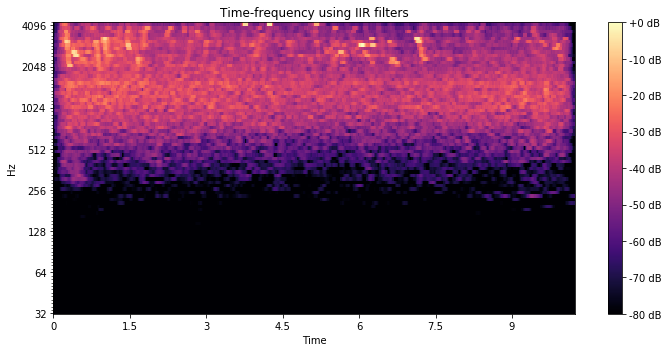

In [13]:
D = librosa.iirt(y)
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='cqt_hz', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Time-frequency using IIR filters')
plt.tight_layout()

# References

* [Short-Time Fourier Transform](https://musicinformationretrieval.com/stft.html)
* [Stanford Music Information Retrieval](https://github.com/stevetjoa/stanford-mir)
* [Basic FFT Plot with Matplotlib](https://plot.ly/matplotlib/fft/)
* [Plotting a FFT in Python](https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python)
* [librosa 0.5.0.dev0 display not a module](https://github.com/librosa/librosa/issues/441)